#Задача динамического программирования

*Распределить оптимальным способом имеющиеся ресурсы* в размере 200 000 между пятью предприятиями, в каждое из которых нельзя вкладывать более 100 000.

In [0]:
N = 5
Firms = []
Firms.append([0, 10, 20, 40, 100, 160, 180, 190, 200, 210, 215]) #Прибыль, приносимая предприятием 1 в зависимости от вложения
Firms.append([0, 18, 25, 30, 31, 32, 33, 34, 35, 36, 37])
Firms.append([0, 20, 40, 60, 80, 95, 101, 102, 103, 104, 105])
Firms.append([0, 5, 10, 15, 25, 37, 69, 140, 225, 280, 300])
Firms.append([0, 30, 68, 95, 140, 160, 170, 175, 176, 177, 178])
Funds = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100] #Варианты вложения средств. Есть вариант ничего не вкладывать.

###Математическая модель
$N = 5$ этапов. Каждый этап - это рассмотрение соответствующей компании.

$X_0 = 200000$ - стартовый капитал (начальное состояние системы)

На каждом этапе должно приниматься управление $u_k$ - один из вариантов вложения средств, $u_k \in Funds$ - допустимое управление на каждом шаге.

Выигрыш - итоговая прибыль от вложений.

In [0]:
##Можно использовать небольшой пример для отладки работы
#N = 2
#Firms = []
#Firms.append([0, 10, 20]) #Прибыль, приносимая предприятием 1 в зависимости от вложения
#Firms.append([0, 18, 25])
#Funds = [0, 10, 20]

####Вариант решения задачи с применением кэширования

In [0]:
executions = 0
caсhe = dict()
def F(X, k):
    global executions
    if k < N:
        D = dict() #Словарь для хранения выгоды по ключу суммы вложения
        Du = dict() #Словрь для хранения управления с предыдущих шагов по ключу суммы вложения
        U = [] #Текущий список управления
        for ind, val in enumerate(Funds): #Сколько можем вложить

            if k == N - 1:
                executions += 1

            gain =  Firms[k][ind] #Какую прибыль получим при данном вложении
            if X >= val: #Если можем вложить эту сумму
                if (X - val, k+1) in caсhe:
                    f = caсhe[(X - val, k+1)]
                else:
                    f = F(X - val, k+1)
                    caсhe[(X - val, k+1)] = f
                D[val] = gain + f[0]
                Du[val] = f[1]
            elif X > 0: #Если не можем вложить столько
                if (X, k+1) in caсhe:
                    f = caсhe[(X, k+1)]
                else:
                    f = F(X, k+1)
                    caсhe[(X, k+1)] = f            
                D[val] = f[0]
                Du[val] = f[1]
            else: #Если совсем не осталось денег
                break

        profit = max(D.values()) #Максимальная прибыль
        value = max(D, key=D.get) #Управление для получения максимальной прибыли
        U = list(Du[value])  # Предыдущие управления
        U.append(value)
        return max(D.values()), tuple(U)
    else:
        return 0, []

In [0]:
%%time
executions = 0
profit, U = F(200, 0)
print('Максимальная выгода:', profit, 'Наилучшее управление:', U[::-1])
print("Количество итераций:", executions)

Максимальная выгода: 620 Наилучшее управление: (50, 0, 0, 100, 50)
Количество итераций: 222
CPU times: user 1.54 ms, sys: 96 µs, total: 1.64 ms
Wall time: 1.35 ms


####Вариант решения задачи полным перебором

In [0]:
%%time
M = 200
Max = []
U = dict()
executions = 0
for i1, x1 in enumerate(Funds):
    if (x1 > M):
        break
    for i2, x2 in enumerate(Funds):
        if (x1 + x2 > M):
            break
        for i3, x3 in enumerate(Funds):
            if (x1 + x2 + x3 > M):
                break
            for i4, x4 in enumerate(Funds):
                if (x1 + x2 + x3 + x4 > M):
                    break
                for i5, x5 in enumerate(Funds):
                    if (x1 + x2 + x3 + x4 + x5 > M):
                        break
                    executions += 1
                    profit = Firms[0][i1] + Firms[1][i2]+ Firms[2][i3]+ Firms[3][i4]+ Firms[4][i5]
                    Max.append(profit)
                    U[profit] = (x1, x2, x3, x4, x5)

profit = max(Max)
print("Максимальная выгода:", profit, 'Опимальное управление:', U[profit])
print("Количество итераций:", executions)

Максимальная выгода: 620 Опимальное управление: (60, 0, 10, 90, 40)
Количество итераций: 43120
CPU times: user 36.1 ms, sys: 3.01 ms, total: 39.1 ms
Wall time: 38.9 ms


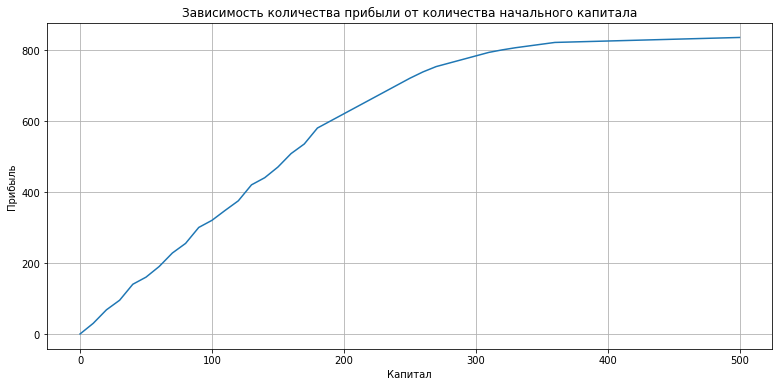

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
space = np.linspace(0, 500, num=51)
profit = []

for m in space:
    p, _ = F(m, 0)
    profit.append(p)

plt.figure(figsize=(13, 6))
plt.plot(space, profit)
plt.title('Зависимость количества прибыли от количества начального капитала')
plt.grid()
plt.xlabel('Капитал')
plt.ylabel('Прибыль')
plt.show()